In [2]:
import pandas as pd
import numpy as np
from GM11 import GM11

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from woa import WOA

In [2]:
inputfile1 = './new_reg_data.csv'
inputfile2 = './data.csv'
new_reg_data = pd.read_csv(inputfile1, index_col=0)
data = pd.read_csv(inputfile2, index_col=0)
new_reg_data.index = range(1994, 2014)
new_reg_data.loc[2014] = None
new_reg_data.loc[2015] = None

/var/folders/x0/_fyb4bw1227f047cqg5wjm5w0000gn/T/ipykernel_7661/1109474087.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_reg_data.loc[2014] = None
/var/folders/x0/_fyb4bw1227f047cqg5wjm5w0000gn/T/ipykernel_7661/1109474087.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_reg_data.loc[2015] = None


In [3]:
cols = new_reg_data.keys()
for col in cols:
    f = GM11(new_reg_data.loc[range(1994, 2014), col].values)[0]
    new_reg_data.loc[2014, col] = f(len(new_reg_data)-1)
    new_reg_data.loc[2015, col] = f(len(new_reg_data))
    new_reg_data[col] = new_reg_data[col].round(2)

In [4]:
outputfile = 'predict_GM11.csv'
y = list(data['y'].values)
y.extend((np.nan, np.nan))
new_reg_data['y'] = y
new_reg_data.to_csv(outputfile)
print('预测结果为:\n', new_reg_data.loc[2014:2015, :])

预测结果为:
               x1       x3        x4        x5          x6       x7        x8  \
2014  8142148.24  7042.31  43611.84  35046.63  8505522.58  4600.40  18686.28   
2015  8460489.28  8166.92  47792.22  38384.22  8627139.31  5214.78  21474.47   

           x13   y  
2014  44506.47 NaN  
2015  49945.88 NaN  


In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

In [6]:
def standard(data):
    return (data - np.mean(data)) / np.std(data)

inputfile = './predict_GM11.csv'
data = pd.read_csv(inputfile, index_col=0)
feature = data.keys()[:-1]
data_train = data.loc[1994:2013].copy()

scaler = StandardScaler()
scaler.set_output(transform="pandas")
data_train = scaler.fit_transform(data_train)
x_train = data_train[feature].values
y_train = data_train['y'].values

In [7]:
linearSVR = LinearSVR()
linearSVR.fit(x_train, y_train)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x = scaler_x.fit_transform(data[feature])
scaler_y.fit(data['y'].values.reshape(-1, 1)[:-2])
data[u'y_pred'] = linearSVR.predict(x) * np.std(data['y']) + np.mean(data['y'])
outfile = 'predict_SVR_GM11.csv'
data.to_csv(outfile)

/Users/koschei/Project/MathModel/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


真实值与预测值分别为:
             y       y_pred
1994    64.87    44.104299
1995    99.75    79.904625
1996    88.11    86.768637
1997   106.07    94.666548
1998   137.32   129.348498
1999   188.14   157.178825
2000   219.91   180.060276
2001   271.91   186.257086
2002   269.10   175.776953
2003   300.55   239.903714
2004   338.45   304.281554
2005   408.86   366.111501
2006   476.72   437.737897
2007   838.99   545.377928
2008   843.14   665.127171
2009  1107.67   860.384768
2010  1399.16  1091.936644
2011  1535.14  1216.263546
2012  1579.68  1376.943489
2013  2088.14  1652.985240
2014      NaN  1730.648790
2015      NaN  2009.501569


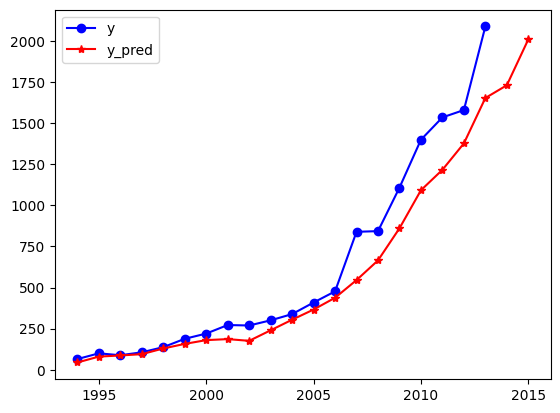

In [8]:
print('真实值与预测值分别为:\n', data[['y', 'y_pred']])
fig = data[['y', 'y_pred']].plot(style=['b-o', 'r-*'])
plt.show()

In [9]:
# 回归评价指标
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error,\
    explained_variance_score, r2_score
y_pred = data['y_pred'][:-2]
y = data['y'][:-2]
print('平均绝对误差(MAE):', mean_absolute_error(y, y_pred))
print('中值绝对误差(MAE):', median_absolute_error(y, y_pred))
print('均方误差(MSE):', mean_squared_error(y, y_pred))
print('均方根误差(RMSE):', np.sqrt(mean_squared_error(y, y_pred)))
print('可解释性方差:', explained_variance_score(y, y_pred))
print('R2:', r2_score(y, y_pred))

平均绝对误差(MAE): 123.52803999452047
中值绝对误差(MAE): 51.69739283424323
均方误差(MSE): 31669.094002843707
均方根误差(RMSE): 177.95812429569972
可解释性方差: 0.9534644020601234
R2: 0.9101920993698271


In [10]:
np.zeros(2)

array([0., 0.])

In [10]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
y_train = scaler_y.fit_transform(np.reshape(y_train, (-1, 1)))
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=20, shuffle=True)
svr = SVR(C=parm[0], gamma=parm[1])
svr.fit(x_train, y_train)
y_pred = scaler_y.inverse_transform(np.reshape(svr.predict(x_test), (-1, 1)))
y_test = scaler_y.inverse_transform(np.reshape(y_test, (-1, 1)))
np.sqrt(mean_squared_error(y_test, y_pred))
scaler_x.inverse_transform(x_train)

array([[ 1.31955403,  1.42210358,  1.36785843,  1.371324  ,  1.18486758,
         1.54001512,  1.53674849,  1.47681398],
       [-1.49719172, -1.39925492, -1.44256207, -1.44475935, -1.58155128,
        -1.25946236, -1.25677909, -1.3357385 ]])

At iteration: 0
At iteration: 100
At iteration: 200
At iteration: 300
At iteration: 400
At iteration: 500
At iteration: 600
At iteration: 700
At iteration: 800
At iteration: 900
At iteration: 1000
At iteration: 1100
At iteration: 1200
At iteration: 1300
At iteration: 1400
At iteration: 1500
At iteration: 1600
At iteration: 1700
At iteration: 1800
At iteration: 1900


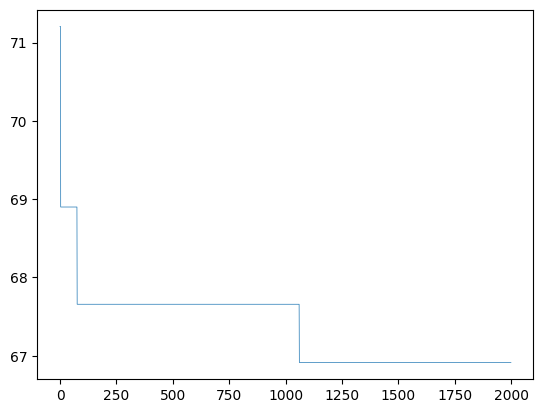

array([46110079.11140834])

In [3]:
inputfile = './predict_GM11.csv'
data = pd.read_csv(inputfile, index_col=0)
feature = data.keys()[:-1]
data = data.loc[1994:2013].copy()
x_train = data[feature].values
y_train = data['y'].values

def target_Func(parm, x_train, y_train):
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    x_train = scaler_x.fit_transform(x_train)
    y_train = scaler_y.fit_transform(np.reshape(y_train, (-1, 1)))
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=20, shuffle=True)
    svr = LinearSVR(C=parm[0])
    svr.fit(x_train, y_train)
    y_pred = scaler_y.inverse_transform(np.reshape(svr.predict(x_test), (-1, 1)))
    y_test = scaler_y.inverse_transform(np.reshape(y_test, (-1, 1)))
    # print(parm[0], parm[1])
    return np.sqrt(mean_squared_error(y_test, y_pred))

c_g_lower_bounds = np.array([1e-10])
c_g_upper_bounds = np.array([1e10])
woa_model = WOA(x_train, y_train, target_Func, c_g_lower_bounds, c_g_upper_bounds, dim=1, whale_num=100, max_iter=2000)
parm, curve = woa_model.optimize()
plt.figure()
plt.plot(curve, linewidth='0.5')
plt.show()
parm

In [6]:
parm

array([2.65187198e+05, 5.53505794e-02])

In [10]:
inputfile = './predict_GM11.csv'
data = pd.read_csv(inputfile, index_col=0)
feature = data.keys()[:-1]
data = data.loc[1994:2013].copy()
x_train = data[feature].values
y_train = data['y'].values

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
y_train = scaler_y.fit_transform(np.reshape(y_train, (-1, 1)))
svr = LinearSVR(C=46110079.11140834)
svr.fit(x_train, y_train)
y_pred = scaler_y.inverse_transform(np.reshape(svr.predict(x_train), (-1, 1)))
y = scaler_y.inverse_transform(np.reshape(y_train, (-1, 1)))
data['y_pred'] = y_pred
# outfile = 'predict_SVR_GM11.csv'
# data.to_csv(outfile)
y_pred = data['y_pred'][:-2]
y = data['y'][:-2]
# 回归评价指标
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error,\
    explained_variance_score, r2_score
y_pred = data['y_pred'][:-2]
y = data['y'][:-2]
print('平均绝对误差(MAE):', mean_absolute_error(y, y_pred))
print('中值绝对误差(MAE):', median_absolute_error(y, y_pred))
print('均方误差(MSE):', mean_squared_error(y, y_pred))
print('均方根误差(RMSE):', np.sqrt(mean_squared_error(y, y_pred)))
print('可解释性方差:', explained_variance_score(y, y_pred))
print('R2:', r2_score(y, y_pred))

平均绝对误差(MAE): 32.13665914404287
中值绝对误差(MAE): 29.22630557991822
均方误差(MSE): 1831.7529934569861
均方根误差(RMSE): 42.798983556353136
可解释性方差: 0.9932867693511852
R2: 0.9909379027906446


真实值与预测值分别为:
             y       y_pred
1994    64.87   -33.721654
1995    99.75    56.958499
1996    88.11    93.809693
1997   106.07   106.070000
1998   137.32   151.285496
1999   188.14   182.892332
2000   219.91   189.966954
2001   271.91   182.839683
2002   269.10   236.024182
2003   300.55   242.993924
2004   338.45   327.900093
2005   408.86   401.683490
2006   476.72   448.210435
2007   838.99   776.613427
2008   843.14   884.757886
2009  1107.67  1139.510904
2010  1399.16  1381.626212
2011  1535.14  1532.226536
2012  1579.68  1696.268916
2013  2088.14  2025.475881


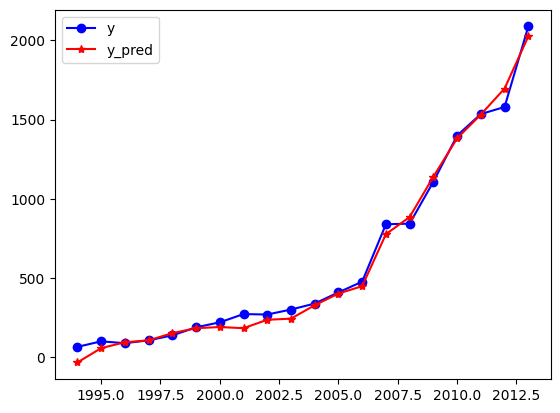

In [11]:
print('真实值与预测值分别为:\n', data[['y', 'y_pred']])
fig = data[['y', 'y_pred']].plot(style=['b-o', 'r-*'])
plt.show()

In [12]:
inputfile = './predict_GM11.csv'
data = pd.read_csv(inputfile, index_col=0)
feature = data.keys()[:-1]
x_train = data[feature].values
y_train = data['y'].values

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
y_train = scaler_y.fit_transform(np.reshape(y_train, (-1, 1)))
y_pred = np.reshape(svr.predict(x_train), (-1, 1))
y = scaler_y.inverse_transform(y_pred)
data['y_pred'] = y

In [13]:
data

,x1,x3,x4,x5,x6,x7,x8,x13,y,y_pred
1994,3831732.00,448.19,7571.00,6212.70,6370241.00,525.71,985.31,5321.00,64.87,-37.586037
1995,3913824.00,549.97,9038.16,7601.73,6467115.00,618.25,1259.20,6529.00,99.75,38.135679
1996,3928907.00,686.44,9905.31,8092.82,6560508.00,638.94,1468.06,7008.00,88.11,70.077324
1997,4282130.00,802.59,10444.60,8767.98,6664862.00,656.58,1678.12,7694.00,106.07,78.365523
1998,4453911.00,904.57,11255.70,9422.33,6741400.00,758.83,1893.52,8027.00,137.32,114.617264
1999,4548852.00,1000.69,12018.52,9751.44,6850024.00,878.26,2139.18,8549.00,188.14,141.318482
2000,4962579.00,1121.13,13966.53,11349.47,7006896.00,923.67,2492.74,9566.00,219.91,146.111715
2001,5029338.00,1248.29,14694.00,11467.35,7125979.00,978.21,2841.65,10473.00,271.91,141.905106
2002,5070216.00,1370.68,13380.47,10671.78,7206229.00,1009.24,3203.96,11469.00,269.10,186.603969
2003,5210706.00,1494.27,15002.59,11570.58,7251888.00,1175.17,3758.62,12360.00,300.55,190.875556
